## Лабораторная работа №1 | Вариант 6

Выполнил: 

### 1. Numpy

In [3]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [4]:
identity_matrix = np.eye(3)
print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [5]:
matrix = np.zeros((5, 5), dtype=int)
values = [1, 2, 3, 4]
for i, val in enumerate(values):
    matrix[i+1, i] = val
print(matrix)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [1]:
print("Результат встроенной sum:")
print(sum(range(5),-1))  # 9 (-1 + 0 + 1 + 2 + 3 + 4 = 9)

from numpy import *
print("Результат numpy sum:")
print(sum(range(5),-1))  # 10 (игнорирует -1: 0 + 1 + 2 + 3 + 4 = 10)

Результат встроенной sum:
9
Результат numpy sum:
10


4. Как найти самое часто встречаемое значение между двумя массивами? 

In [12]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([3, 4, 5, 6, 7])
comb = np.concatenate([arr1, arr2])
values, count = np.unique(comb, return_counts=True)
most_frequent = values[np.argmax(count)]
print(most_frequent)

3


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [13]:
import warnings
warnings.filterwarnings('ignore')

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [15]:
def generate_numbers():
    for i in range(10):
        yield i

generated_array = np.fromiter(generate_numbers(), dtype=int)
print(generated_array)

[0 1 2 3 4 5 6 7 8 9]


7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [24]:
rand_arr = np.random.rand(10)
sorted_arr = np.sort(rand_arr)
print(rand_arr)
print(sorted_arr)

[0.10597981 0.89922041 0.65931898 0.87996962 0.59555224 0.24697597
 0.59445747 0.02282527 0.62743754 0.9290266 ]
[0.02282527 0.10597981 0.24697597 0.59445747 0.59555224 0.62743754
 0.65931898 0.87996962 0.89922041 0.9290266 ]


8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [25]:
coord = np.random.rand(10, 2)
x, y = coord[:, 0], coord[:, 1]
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)
polar_coord = (np.column_stack((r, theta)))
print(coord)
print(polar_coord)

[[0.38353973 0.44349294]
 [0.06404378 0.88989875]
 [0.20019294 0.1155374 ]
 [0.47790148 0.53227177]
 [0.26966143 0.17657737]
 [0.25722741 0.11556898]
 [0.02346352 0.22466059]
 [0.65935038 0.14713728]
 [0.33222306 0.15191882]
 [0.38425803 0.09390765]]
[[0.58633498 0.85776353]
 [0.89220031 1.4989527 ]
 [0.23114087 0.52343374]
 [0.71533423 0.83916902]
 [0.32233035 0.57975011]
 [0.28199669 0.42226099]
 [0.22588253 1.46673373]
 [0.67556814 0.21955757]
 [0.36531013 0.42889112]
 [0.39556653 0.23968886]]


9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [26]:
pixel_dtype = np.dtype([('x', 'i4'), ('y', 'i4'), ('r', 'u1'), ('g', 'u1'), ('b', 'u1')])
pixel = np.array([(10, 20, 255, 0, 0), (30, 40, 0, 255, 0)], dtype=pixel_dtype)
print(pixel)

[(10, 20, 255,   0, 0) (30, 40,   0, 255, 0)]


10. Как конвертировать тип массив от float32 в int32 in place?

In [27]:
float_arr = np.array([1.1, 2.2, 3.3], dtype=np.float32)
float_arr = float_arr.astype(np.int32, copy=False)
print(float_arr, float_arr.dtype)

[1 2 3] int32


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('student_perfomance.csv')
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

Размер датасета: (6607, 20)

Первые 5 строк:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Fami

1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [30]:
average_sleep = df['Sleep_Hours'].mean()
print(average_sleep)

7.029060087785682


2. Сколько процентов студентов посещают внеклассовые активности?

In [41]:
percent_active = ((df['Extracurricular_Activities'] == 'Yes').sum() / len(df)) * 100
print(f'{percent_active:.2f}%')

59.60%


3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [45]:
gender_score = df.groupby('Gender')['Exam_Score'].mean()
print(gender_score)
print(f"Девушки сдают лучше: {gender_score['Female'] > gender_score['Male']}")

Gender
Female    67.244898
Male      67.228894
Name: Exam_Score, dtype: float64
Девушки сдают лучше: True


4. Выведите 25 и 75 перцентили времени сна студентов

In [57]:
sleep_percentiles = df['Sleep_Hours'].quantile([0.25, 0.75])
print("Перцентили времени сна:")
print(f"25-й перцентиль: {sleep_percentiles[0.25]:.2f}")
print(f"75-й перцентиль: {sleep_percentiles[0.75]:.2f}")

Перцентили времени сна:
25-й перцентиль: 6.00
75-й перцентиль: 8.00


5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [56]:
sleep_25 = df['Sleep_Hours'].quantile(0.25)
sleep_75 = df['Sleep_Hours'].quantile(0.75)

low_sleep = df[df['Sleep_Hours'] <= sleep_25]['Exam_Score'].mean()
high_sleep = df[df['Sleep_Hours'] >= sleep_75]['Exam_Score'].mean()

print(f"Средний балл при недосыпе: {low_sleep:.2f}")
print(f"Средний балл при достаточном сне: {high_sleep:.2f}")
print(f"Студенты с хорошим сном сдают лучше: {high_sleep > low_sleep}")

Средний балл при недосыпе: 67.28
Средний балл при достаточном сне: 67.19
Студенты с хорошим сном сдают лучше: False


6. Влияет ли физическая активность на результаты экзамена?

In [55]:
activity_corr = df['Physical_Activity'].corr(df['Exam_Score'])
print(f"Корреляция физической активности и баллов: {activity_corr:.3f}")

Корреляция физической активности и баллов: 0.028


7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [54]:
high_edu = df[df['Parental_Education_Level'].isin(['College', 'Postgraduate'])]['Exam_Score'].mean()
other_edu = df[~df['Parental_Education_Level'].isin(['College', 'Postgraduate'])]['Exam_Score'].mean()

print(f"Средний балл при высшем образовании родителей: {high_edu:.2f}")
print(f"Средний балл при другом образовании: {other_edu:.2f}")
print(f"Студенты с образованными родителями сдают лучше: {high_edu > other_edu}")

Средний балл при высшем образовании родителей: 67.58
Средний балл при другом образовании: 66.90
Студенты с образованными родителями сдают лучше: True


8. Как влияет участие родителей на результаты экзаменов

In [53]:
involvement_mapping = {
    'Low': 1,
    'Medium': 2, 
    'High': 3,
}

df['Parental_Involvement_Num'] = df['Parental_Involvement'].map(involvement_mapping)

parental_corr = df['Parental_Involvement_Num'].corr(df['Exam_Score'])
print(f"Корреляция участия родителей и баллов: {parental_corr:.3f}")

Корреляция участия родителей и баллов: 0.157


9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [62]:
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Family_Income_Num'] = df['Family_Income'].map(income_mapping)

involvement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Parental_Involvement_Num'] = df['Parental_Involvement'].map(involvement_mapping)

avg_income = df['Family_Income_Num'].mean()
high_income_students = df[df['Family_Income_Num'] > avg_income]
low_income_students = df[df['Family_Income_Num'] <= avg_income]

high_income_score = high_income_students['Exam_Score'].mean()
low_income_score = low_income_students['Exam_Score'].mean()

print(f"Средний балл при доходе выше среднего: {high_income_score:.2f}")
print(f"Средний балл при доходе ниже среднего: {low_income_score:.2f}")
print(f"Студенты из богатых семей сдают лучше: {high_income_score > low_income_score}")

Средний балл при доходе выше среднего: 67.50
Средний балл при доходе ниже среднего: 66.85
Студенты из богатых семей сдают лучше: True


10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [76]:
low_income_no_internet = df[
    (df['Family_Income'] == 'Low') & 
    (df['Internet_Access'] == 'No') 
]

if len(low_income_no_internet) > 0:
    high_scorers = low_income_no_internet[low_income_no_internet['Exam_Score'] > 70]
    percentage = (len(high_scorers) / len(low_income_no_internet)) * 100
    
    print(f"Доля студентов с баллом > 70 (низкий доход, нет интернета): {percentage:.2f}%")    

Доля студентов с баллом > 70 (низкий доход, нет интернета): 8.06%


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

Matplotlib is building the font cache; this may take a moment.


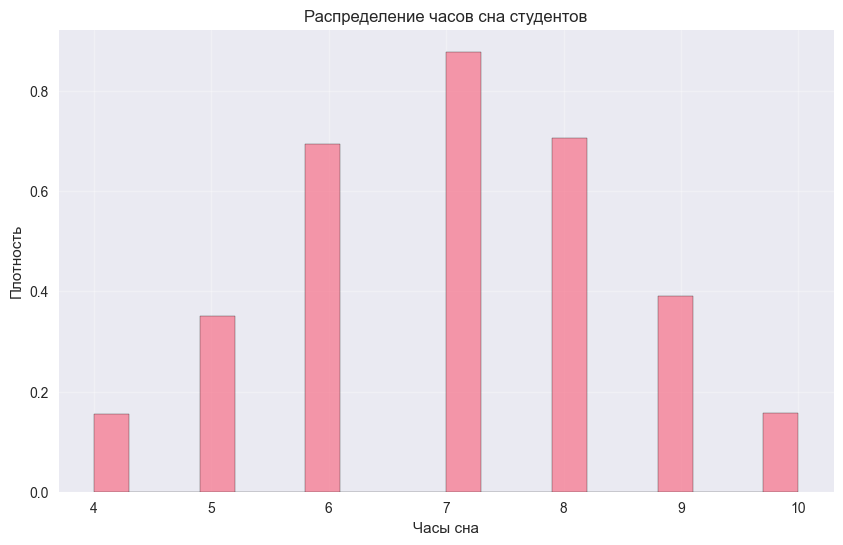

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

plt.figure(figsize=(10, 6))
plt.hist(df['Sleep_Hours'], bins=20, density=True, alpha=0.7, edgecolor='black')
plt.title('Распределение часов сна студентов')
plt.xlabel('Часы сна')
plt.ylabel('Плотность')
plt.grid(True, alpha=0.3)
plt.show()

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

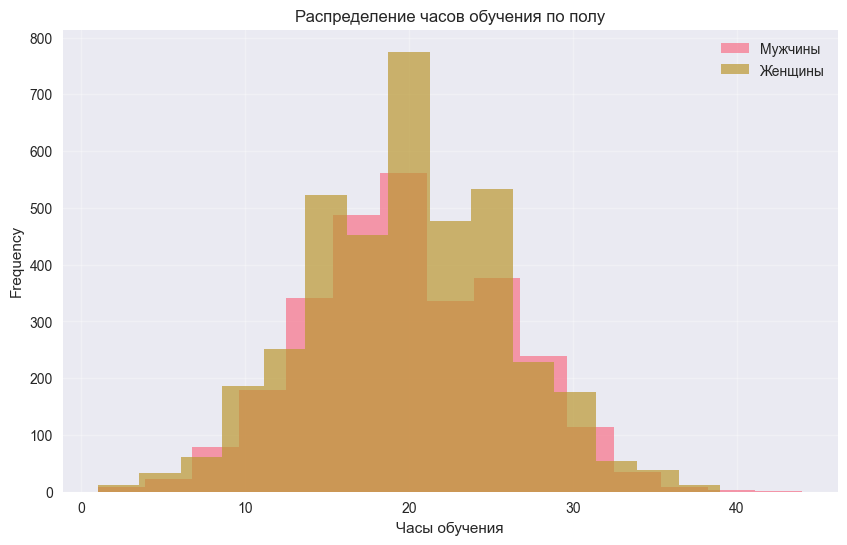

In [79]:
plt.figure(figsize=(10, 6))
df.groupby('Gender')['Hours_Studied'].plot(kind='hist', alpha=0.7, legend=True, bins=15)
plt.title('Распределение часов обучения по полу')
plt.xlabel('Часы обучения')
plt.legend(['Мужчины', 'Женщины'])
plt.grid(True, alpha=0.3)
plt.show()

3. Как зависит результат конечного экзамена от результата первого экзамена

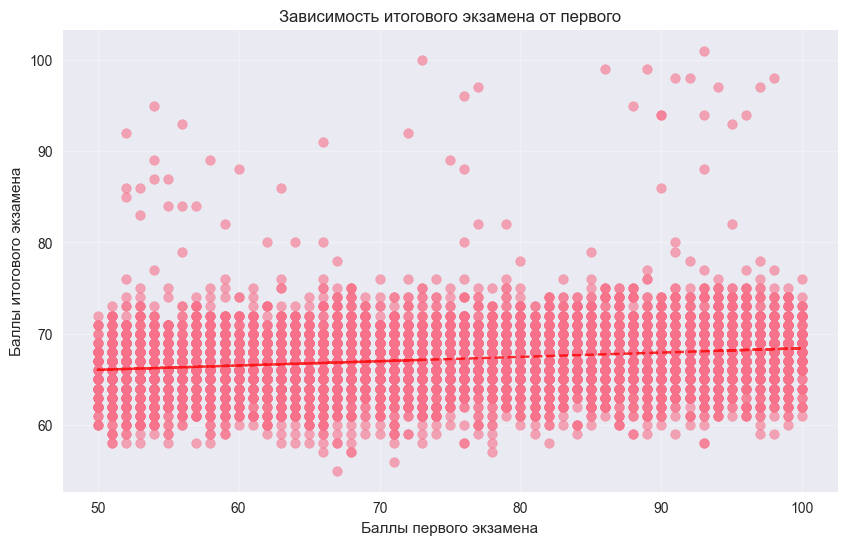

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.6)
plt.title('Зависимость итогового экзамена от первого')
plt.xlabel('Баллы первого экзамена')
plt.ylabel('Баллы итогового экзамена')
plt.grid(True, alpha=0.3)

z = np.polyfit(df['Previous_Scores'], df['Exam_Score'], 1)
p = np.poly1d(z)
plt.plot(df['Previous_Scores'], p(df['Previous_Scores']), "r--", alpha=0.8)
plt.show()

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

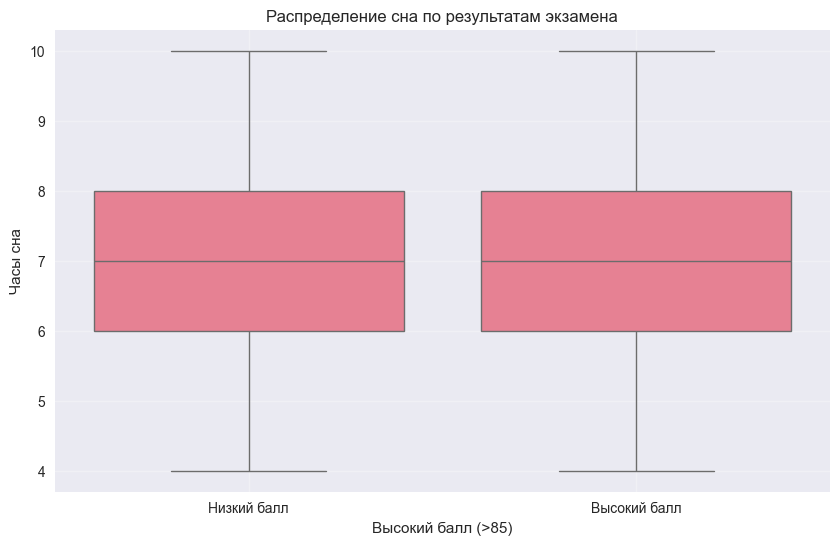

In [81]:
df['High_Score'] = df['Exam_Score'] > 85

plt.figure(figsize=(10, 6))
sns.boxplot(x='High_Score', y='Sleep_Hours', data=df)
plt.title('Распределение сна по результатам экзамена')
plt.xlabel('Высокий балл (>85)')
plt.ylabel('Часы сна')
plt.xticks([0, 1], ['Низкий балл', 'Высокий балл'])
plt.grid(True, alpha=0.3)
plt.show()

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

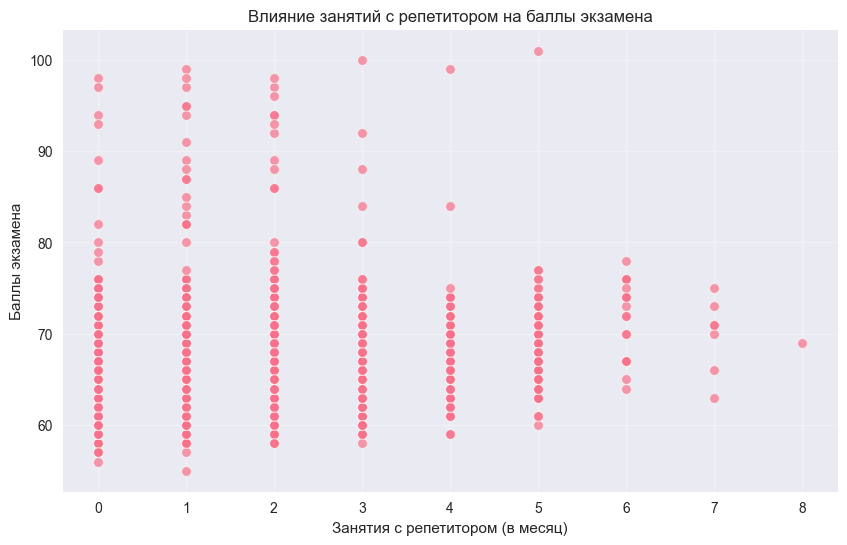

Корреляция занятий с репетитором и баллов: 0.157


In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=df, alpha=0.7)
plt.title('Влияние занятий с репетитором на баллы экзамена')
plt.xlabel('Занятия с репетитором (в месяц)')
plt.ylabel('Баллы экзамена')
plt.grid(True, alpha=0.3)
plt.show()

tutoring_corr = df['Tutoring_Sessions'].corr(df['Exam_Score'])
print(f"Корреляция занятий с репетитором и баллов: {tutoring_corr:.3f}")

6. Как физическая активность влияет на успеваемость?

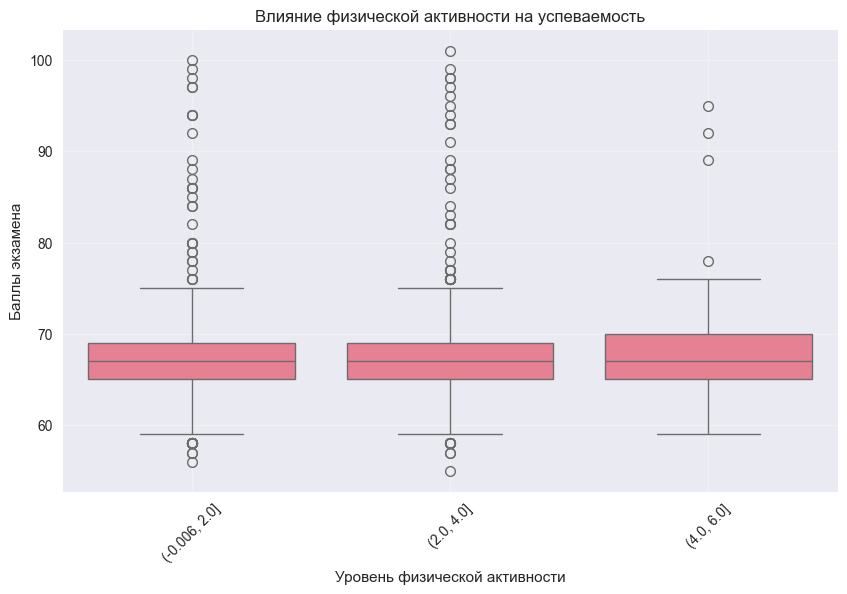

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Physical_Activity'], bins=3), y='Exam_Score', data=df)
plt.title('Влияние физической активности на успеваемость')
plt.xlabel('Уровень физической активности')
plt.ylabel('Баллы экзамена')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл

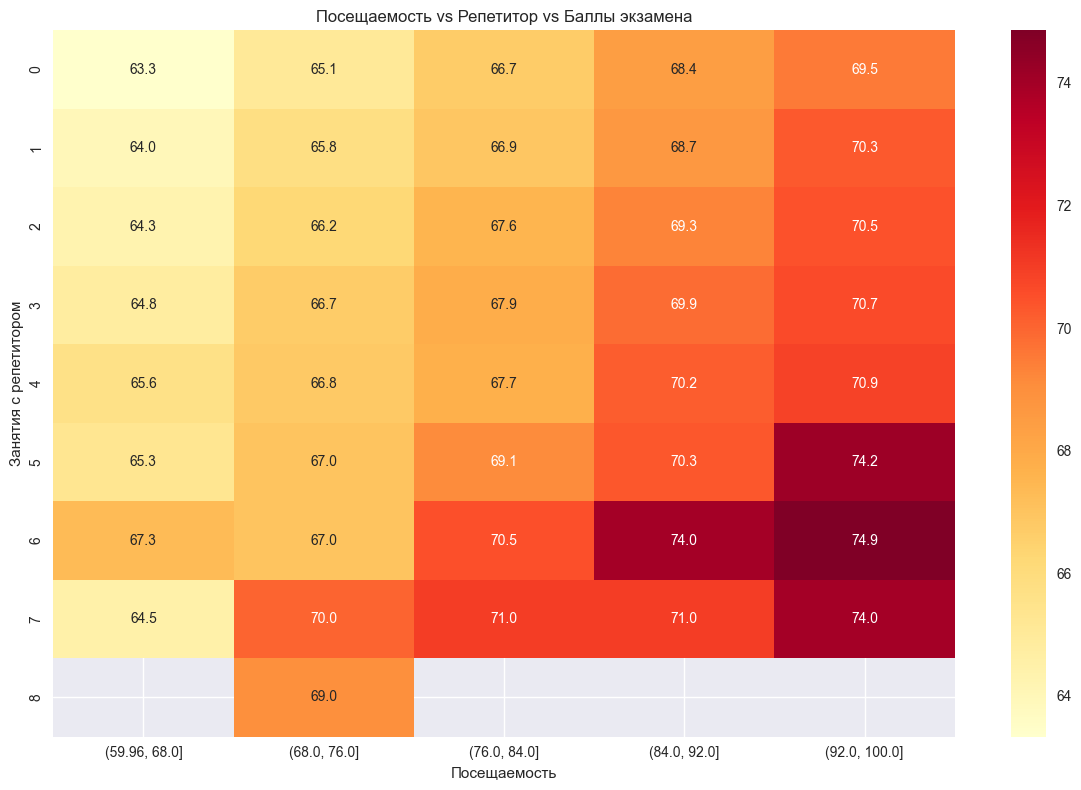

In [85]:
plt.figure(figsize=(12, 8))

pivot_table = df.pivot_table(
    values='Exam_Score', 
    index='Tutoring_Sessions', 
    columns=pd.cut(df['Attendance'], bins=5),
    aggfunc='mean'
)

sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Посещаемость vs Репетитор vs Баллы экзамена')
plt.xlabel('Посещаемость')
plt.ylabel('Занятия с репетитором')
plt.tight_layout()
plt.show()